<a href="https://colab.research.google.com/github/shubhiscoding/Yulu-Bikes-Data-analysis/blob/main/Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

# Observations on data

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [23]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [24]:
df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,workingday_label,season_label,weather_labels
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886,10886,10886
unique,10886,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,4
top,2011-01-01 00:00:00,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Working Day,Winter,Clear
freq,1,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7412,2734,7192
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,NaN,NaN,NaN


# Convert categorical variables to 'category' data type

In [6]:
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

# Univariate Analysis - Distribution plots for continuous variables

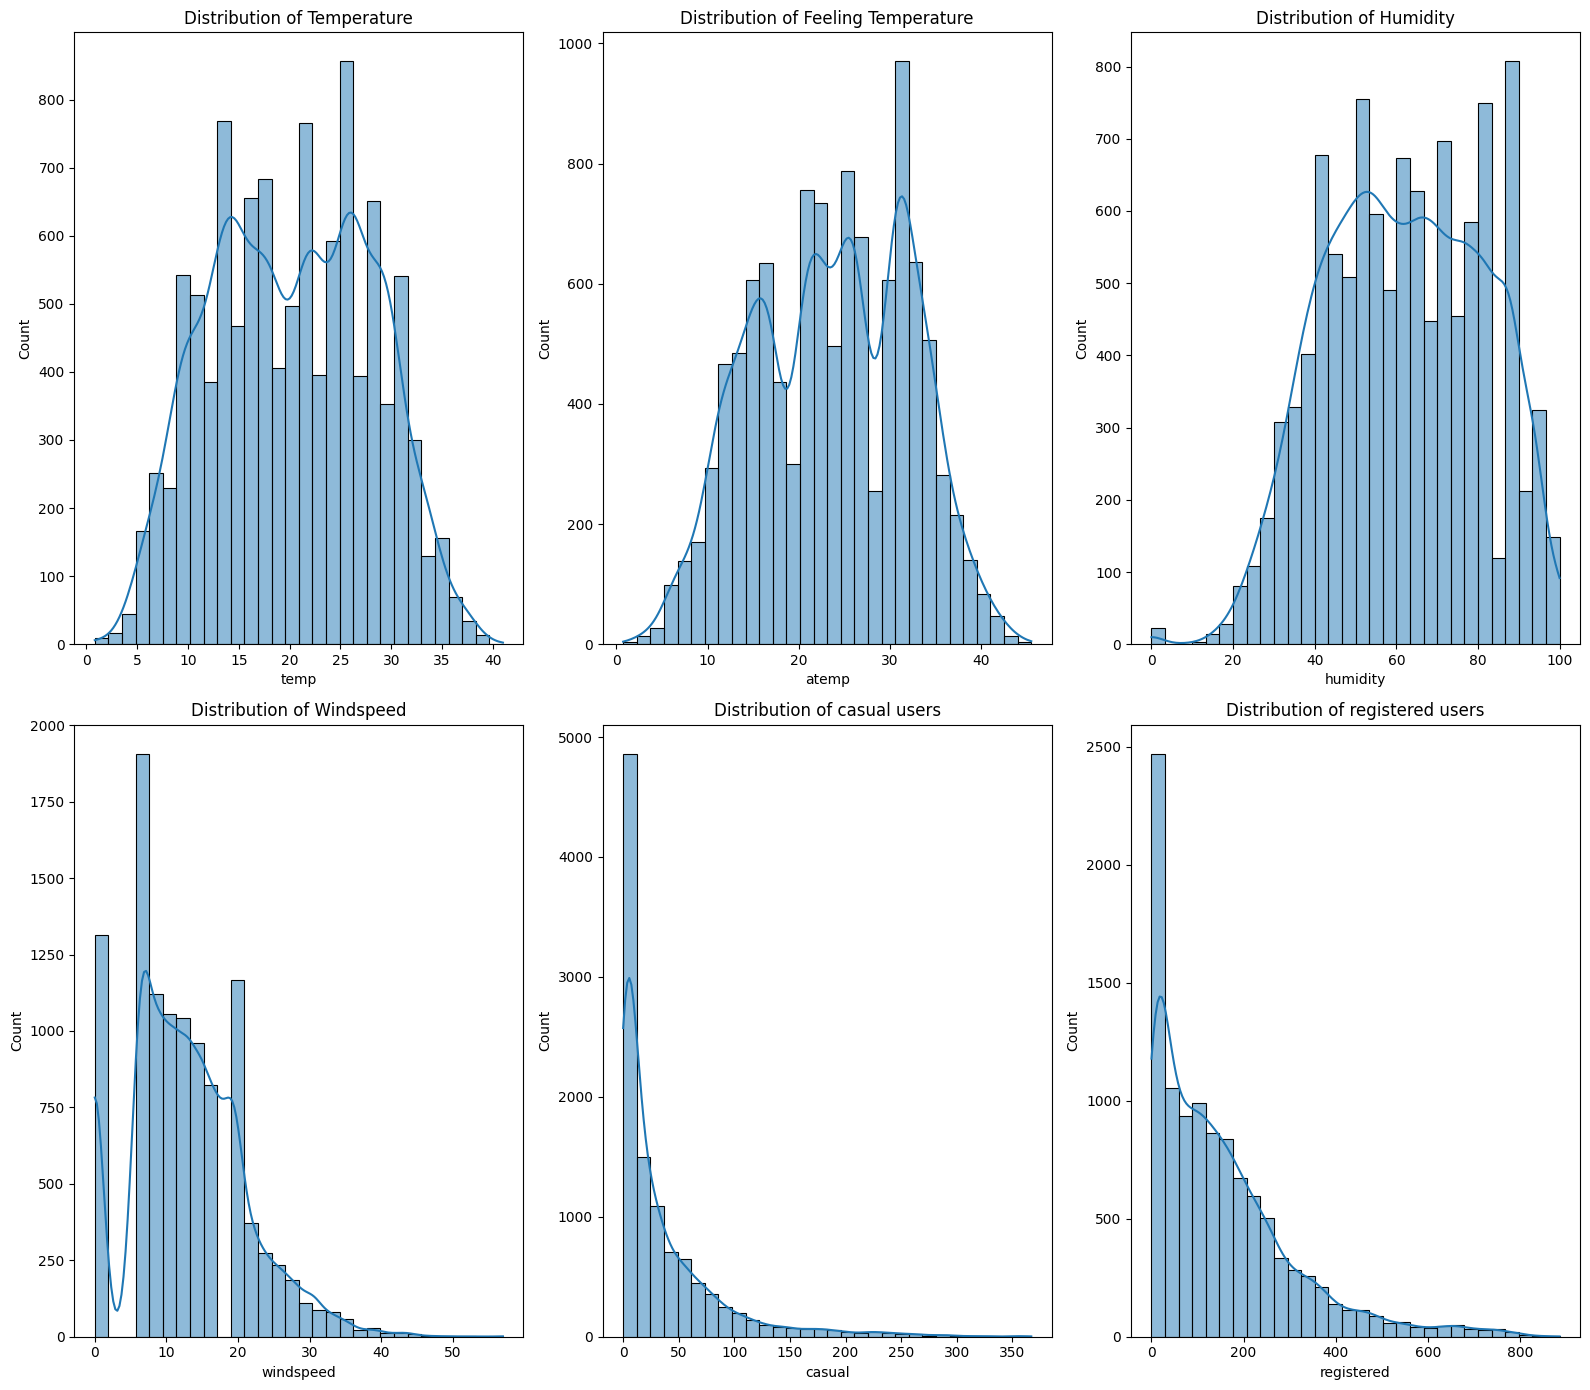

In [40]:
plt.figure(figsize=(16, 14))
plt.subplot(2, 3, 1)
sns.histplot(df['temp'], bins=30, kde=True)
plt.title('Distribution of Temperature')

plt.subplot(2, 2, 2)
sns.histplot(df['atemp'], bins=30, kde=True)
plt.title('Distribution of Feeling Temperature')

plt.subplot(2, 3, 3)
sns.histplot(df['humidity'], bins=30, kde=True)
plt.title('Distribution of Humidity')

plt.subplot(2, 3, 4)
sns.histplot(df['windspeed'], bins=30, kde=True)
plt.title('Distribution of Windspeed')

plt.subplot(2, 3, 5)
sns.histplot(df['casual'], bins=30, kde=True)
plt.title('Distribution of casual users')

plt.subplot(2, 3, 6)
sns.histplot(df['registered'], bins=30, kde=True)
plt.title('Distribution of registered users')

plt.tight_layout()
plt.show()



# Barplots for categorical variables

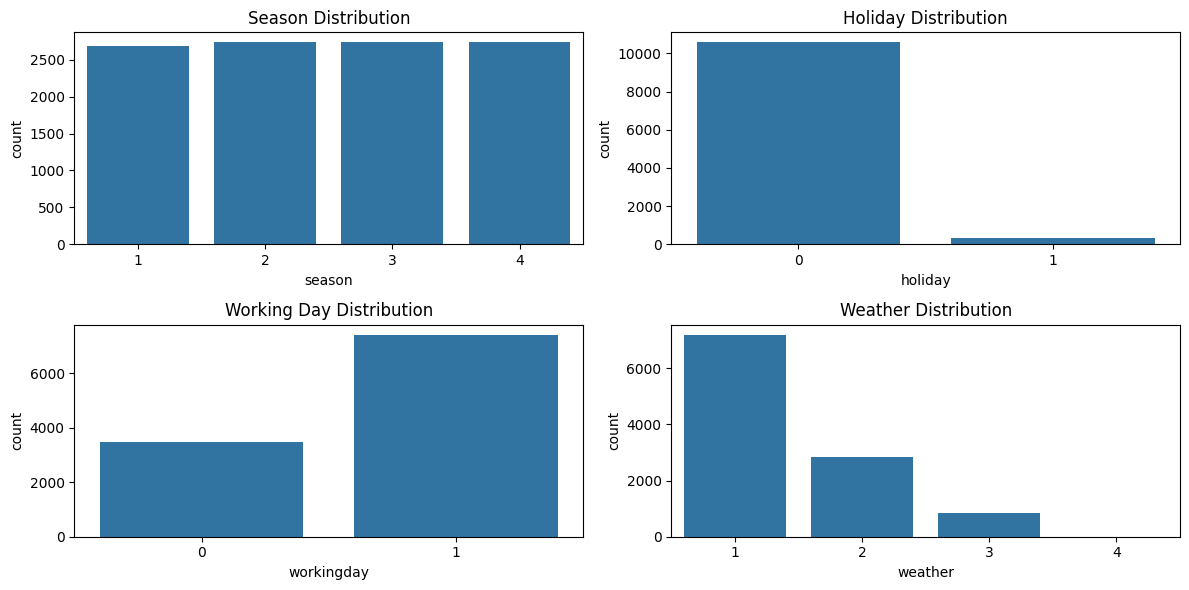

In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='season')
plt.title('Season Distribution')

plt.subplot(2, 2, 2)
sns.countplot(data=df, x='holiday')
plt.title('Holiday Distribution')

plt.subplot(2, 2, 3)
sns.countplot(data=df, x='workingday')
plt.title('Working Day Distribution')

plt.subplot(2, 2, 4)
sns.countplot(data=df, x='weather')
plt.title('Weather Distribution')

plt.tight_layout()
plt.show()

Assuming 1 is a working day and 0 non working day.

Assuming 1,2,3,4 weathers are clear, cloudy, light-rain and thunderstrom respectively.

Assuming 1,2,3,4 seasons are Spring, Summer, Fall, Winter respectively.
Assuming 1 is Holiday and 0 is working day
*   The data for seasons is equal for all the seasons.
*   The data for weather 1 is the most and then 2 and then 3.





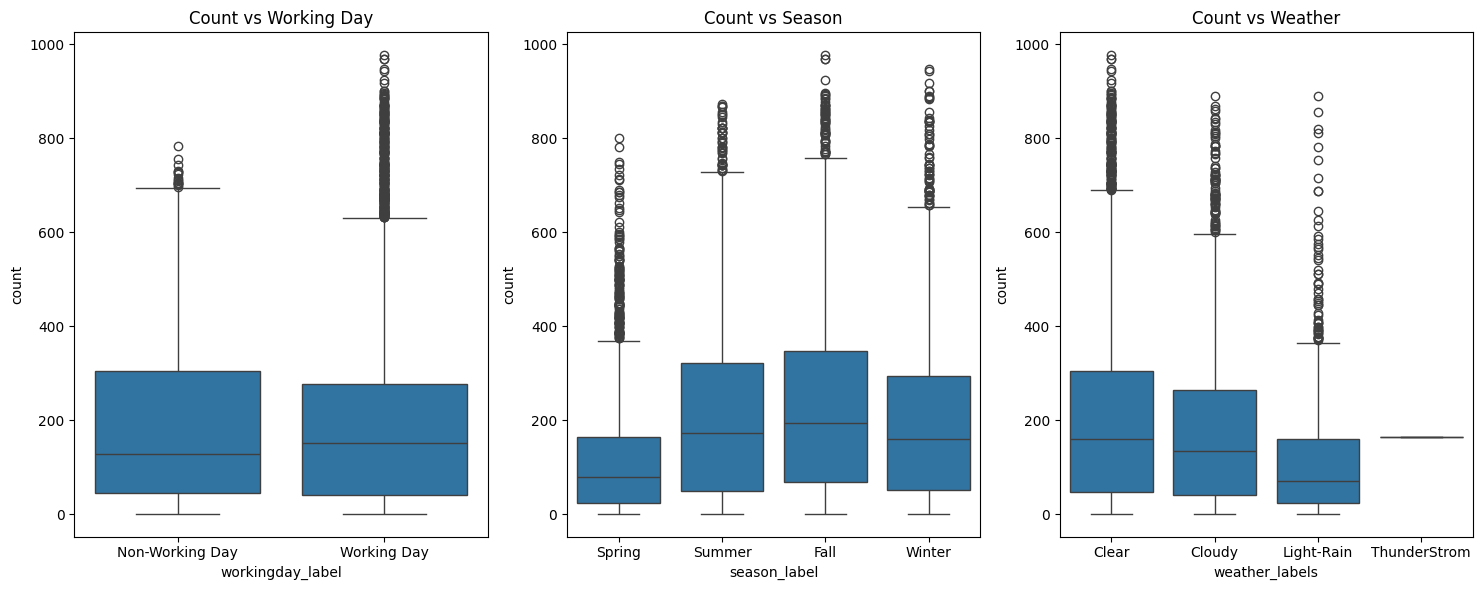

In [9]:
workingday_labels = {0: 'Non-Working Day', 1: 'Working Day'}
df['workingday_label'] = df['workingday'].map(workingday_labels)
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='workingday_label', y='count')
plt.title('Count vs Working Day')

season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season_label'] = df['season'].map(season_labels)
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='season_label', y='count')
plt.title('Count vs Season')

weather_labels = {1:'Clear', 2:'Cloudy', 3:'Light-Rain', 4:'ThunderStrom'}
df['weather_labels'] = df['weather'].map(weather_labels)
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='weather_labels', y='count')
plt.title('Count vs Weather')

plt.tight_layout()
plt.show()


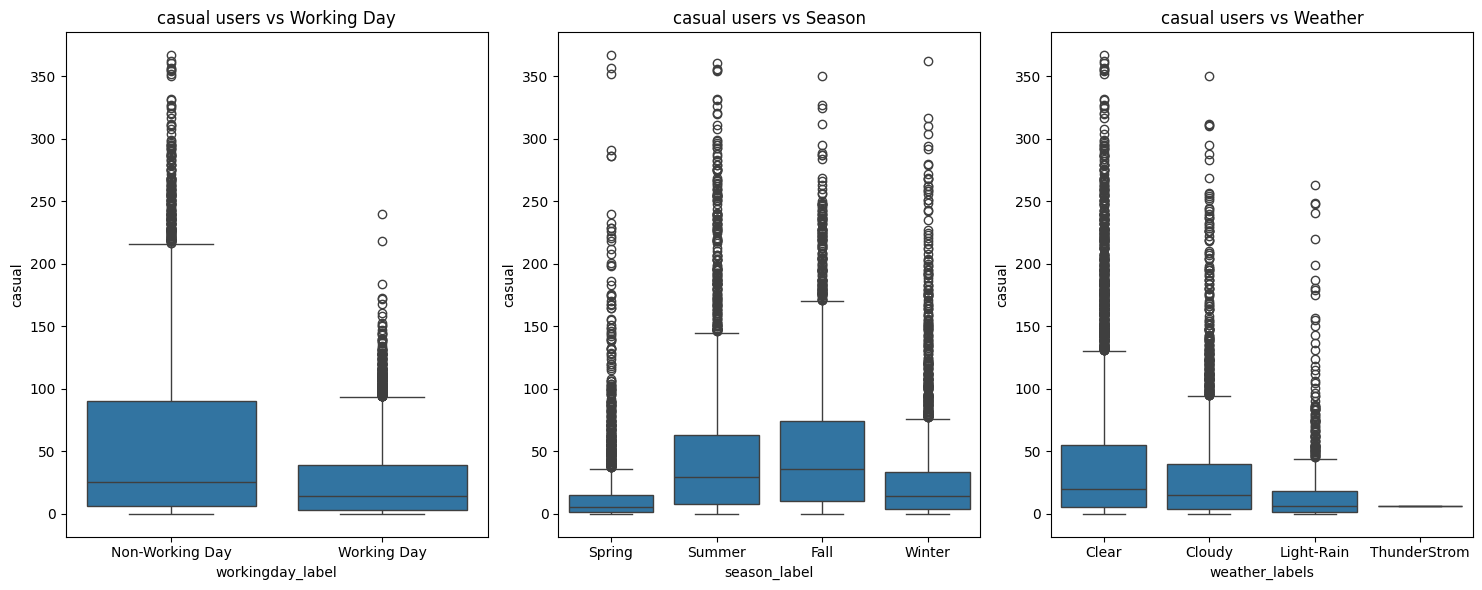

In [31]:
workingday_labels = {0: 'Non-Working Day', 1: 'Working Day'}
df['workingday_label'] = df['workingday'].map(workingday_labels)
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='workingday_label', y='casual')
plt.title('casual users vs Working Day')

season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season_label'] = df['season'].map(season_labels)
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='season_label', y='casual')
plt.title('casual users vs Season')

weather_labels = {1:'Clear', 2:'Cloudy', 3:'Light-Rain', 4:'ThunderStrom'}
df['weather_labels'] = df['weather'].map(weather_labels)
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='weather_labels', y='casual')
plt.title('casual users vs Weather')

plt.tight_layout()
plt.show()


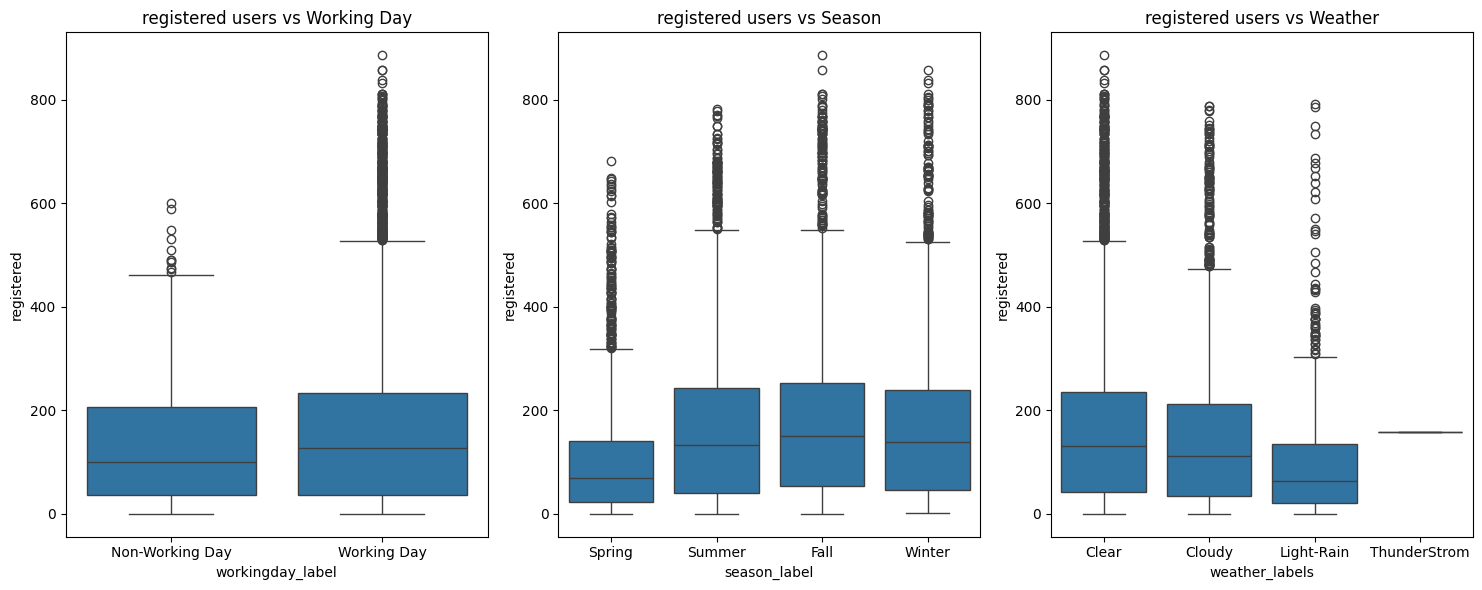

In [32]:
workingday_labels = {0: 'Non-Working Day', 1: 'Working Day'}
df['workingday_label'] = df['workingday'].map(workingday_labels)
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='workingday_label', y='registered')
plt.title('registered users vs Working Day')

season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season_label'] = df['season'].map(season_labels)
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='season_label', y='registered')
plt.title('registered users vs Season')

weather_labels = {1:'Clear', 2:'Cloudy', 3:'Light-Rain', 4:'ThunderStrom'}
df['weather_labels'] = df['weather'].map(weather_labels)
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='weather_labels', y='registered')
plt.title('registered users vs Weather')

plt.tight_layout()
plt.show()

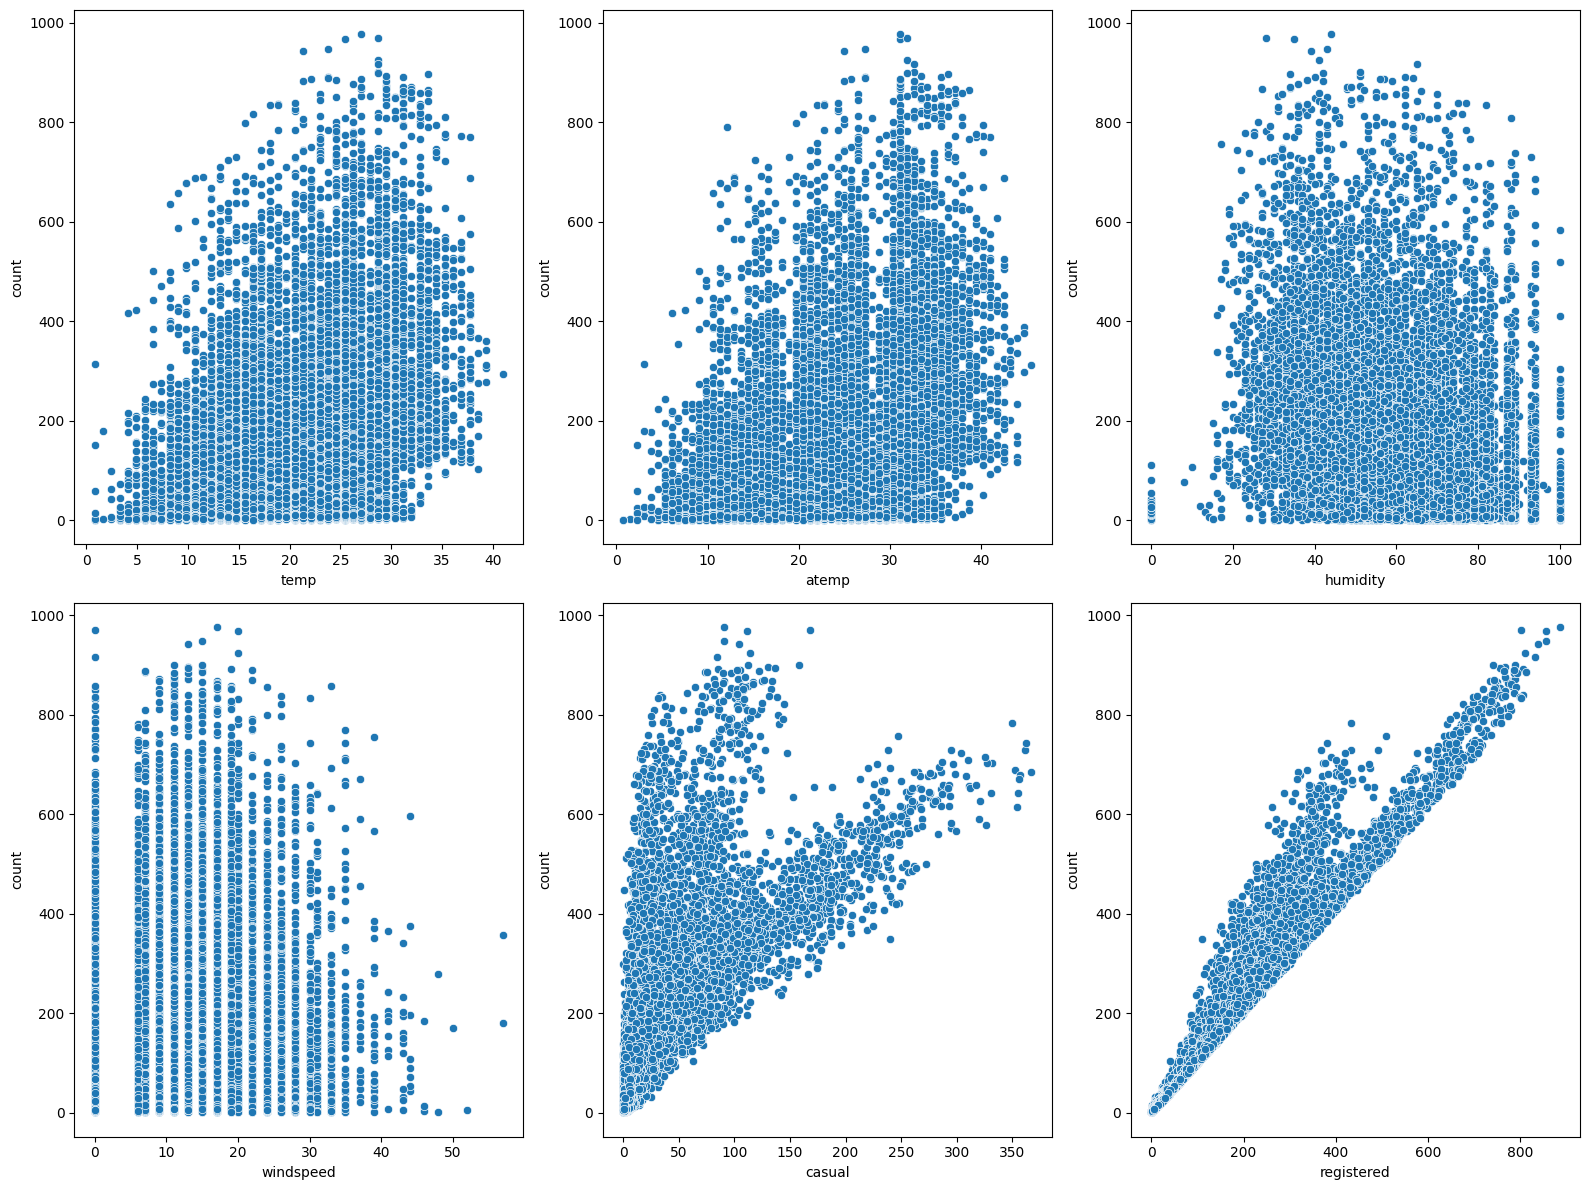

In [37]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 3, 1)
sns.scatterplot(data=df, x=df['temp'],y='count')

plt.subplot(2, 3, 2)
sns.scatterplot(data=df, x=df['atemp'],y='count')

plt.subplot(2, 3, 3)
sns.scatterplot(data=df, x=df['humidity'],y='count')

plt.subplot(2, 3, 4)
sns.scatterplot(data=df, x=df['windspeed'],y='count')

plt.subplot(2, 3, 5)
sns.scatterplot(data=df, x=df['casual'],y='count')

plt.subplot(2, 3, 6)
sns.scatterplot(data=df, x=df['registered'],y='count')

plt.tight_layout()
plt.show()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   datetime          10886 non-null  object  
 1   season            10886 non-null  category
 2   holiday           10886 non-null  category
 3   workingday        10886 non-null  category
 4   weather           10886 non-null  category
 5   temp              10886 non-null  float64 
 6   atemp             10886 non-null  float64 
 7   humidity          10886 non-null  int64   
 8   windspeed         10886 non-null  float64 
 9   casual            10886 non-null  int64   
 10  registered        10886 non-null  int64   
 11  count             10886 non-null  int64   
 12  workingday_label  10886 non-null  category
 13  season_label      10886 non-null  category
 14  weather_labels    10886 non-null  category
dtypes: category(7), float64(3), int64(4), object(1)
memory usage: 756.1+ K

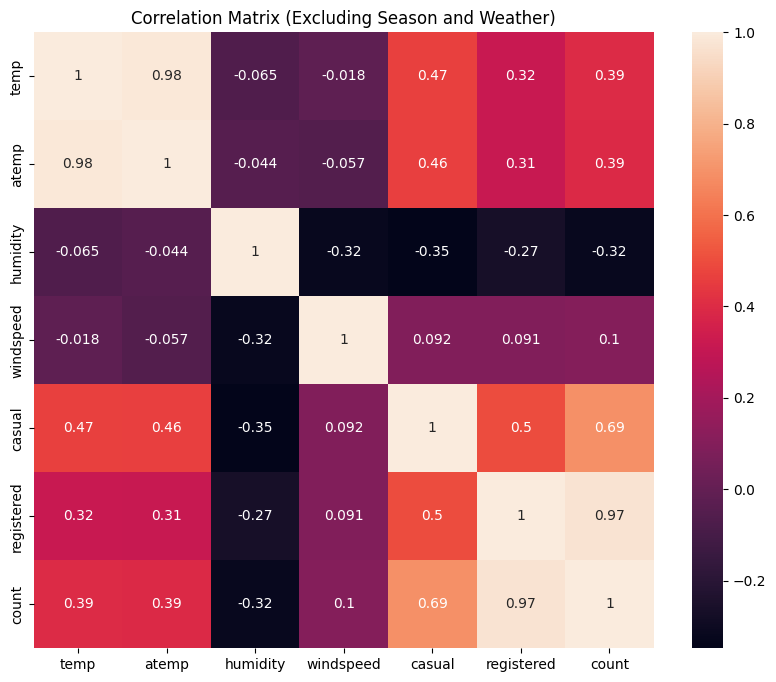

In [63]:
df_encoded = pd.get_dummies(df.drop(columns=['workingday_label', 'season', 'weather', 'holiday', 'workingday', 'season_label', 'weather_labels']))

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Generate heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix (Excluding Season and Weather)')
plt.show()


# 2-Sample T-Test for workingday vs count

In [10]:
from scipy.stats import ttest_ind, f_oneway

In [11]:
workingday_0 = df[df['workingday'] == 0]['count']
workingday_1 = df[df['workingday'] == 1]['count']
t_stat, p_value_ttest = ttest_ind(workingday_0, workingday_1)
print(f'2-Sample T-Test for Working Day vs Count:\nT-Statistic: {t_stat}\nP-Value: {p_value_ttest}')

alpha = 0.05
if p_value_ttest > alpha:
  print("we fail to reject the null hypothesis. There is not enough evidence to suggest that the mean number of cycles rented is different across working and non-working days.")
else:
  print("We reject the null hypothesis, There is significant evidence to suggest that the mean number of cycles rented is different on working days and non-working days")

2-Sample T-Test for Working Day vs Count:
T-Statistic: -1.2096277376026694
P-Value: 0.22644804226361348
we fail to reject the null hypothesis. There is not enough evidence to suggest that the mean number of cycles rented is different across working and non-working days.



# ANOVA Test for weather vs count

In [12]:
weather_groups = [df[df['weather'] == i]['count'] for i in df['weather'].unique()]
f_stat, p_value_anova = f_oneway(*weather_groups)
print(f'\nANOVA for Weather vs Count:\nF-Statistic: {f_stat}\nP-Value: {p_value_anova}')

alpha = 0.05
if p_value_anova > alpha:
  print("we fail to reject the null hypothesis. There is not enough evidence to suggest that the mean number of cycles rented is different across weather descriptions.")
else:
  print("We reject the null hypothesis, There is significant evidence to suggest that the mean number of cycles rented is different across at least one pair of weather descriptions.")


ANOVA for Weather vs Count:
F-Statistic: 65.53024112793271
P-Value: 5.482069475935669e-42
We reject the null hypothesis, There is significant evidence to suggest that the mean number of cycles rented is different across at least one pair of weather descriptions.


# ANOVA Test for season vs count

In [13]:
season_groups = [df[df['season'] == i]['count'] for i in df['season'].unique()]
f_stat, p_value_anova_season = f_oneway(*season_groups)
print(f'\nANOVA for Season vs Count:\nF-Statistic: {f_stat}\nP-Value: {p_value_anova_season}')

alpha = 0.05
if p_value_anova > alpha:
  print("we fail to reject the null hypothesis. There is not enough evidence to suggest that the mean number of cycles rented is different across seasons.")
else:
  print("We reject the null hypothesis, There is significant evidence to suggest that the mean number of cycles rented is different across at least one pair of seasons descriptions.")


ANOVA for Season vs Count:
F-Statistic: 236.94671081032106
P-Value: 6.164843386499654e-149
We reject the null hypothesis, There is significant evidence to suggest that the mean number of cycles rented is different across at least one pair of seasons descriptions.


# Chi-square Test for weather vs season

In [14]:
from scipy.stats import chi2_contingency

In [15]:
contingency_table = pd.crosstab(df['weather'], df['season'])
chi2_stat, p_value_chi2, _, _ = chi2_contingency(contingency_table)
print(f'\nChi-Square Test for Weather vs Season:\nChi-Square Statistic: {chi2_stat}\nP-Value: {p_value_chi2}')

alpha = 0.05
if p_value_chi2 > alpha:
  print("we fail to reject the null hypothesis. There is not enough evidence to suggest that weather and season are dependent, or there's some association among them")
else:
  print("We reject the null hypothesis, There is significant evidence to suggest that weather and season are dependent, or there's some association among them")


Chi-Square Test for Weather vs Season:
Chi-Square Statistic: 49.15865559689363
P-Value: 1.5499250736864862e-07
We reject the null hypothesis, There is significant evidence to suggest that weather and season are dependent, or there's some association among them


# 2-Sample T-Test for workingday vs count

In [16]:
t_stat, p_value_ttest = ttest_ind(workingday_0, workingday_1)
print(f'2-Sample T-Test for Working Day vs Count:\nT-Statistic: {t_stat}\nP-Value: {p_value_ttest}')

alpha = 0.05
if p_value_ttest < alpha:
    print("Reject the null hypothesis,")
    print("There is a significant difference in the number of electric cycles rented between working days and non-working days.")
else:
    print("Fail to reject the null hypothesis,")
    print("There is no significant difference in the number of electric cycles rented between working days and non-working days.")

2-Sample T-Test for Working Day vs Count:
T-Statistic: -1.2096277376026694
P-Value: 0.22644804226361348
Fail to reject the null hypothesis,
There is no significant difference in the number of electric cycles rented between working days and non-working days.


# ANOVA for weather vs count

In [17]:
f_stat, p_value_anova = f_oneway(*weather_groups)
print(f'\nANOVA for Weather vs Count:\nF-Statistic: {f_stat}\nP-Value: {p_value_anova}')

alpha = 0.05
if p_value_anova < alpha:
    print("Reject the null hypothesis,")
    print("There is a significant difference in the number of cycles rented across different weather conditions.")
else:
    print("Fail to reject the null hypothesis,")
    print("There is no significant difference in the number of cycles rented across different weather conditions.")



ANOVA for Weather vs Count:
F-Statistic: 65.53024112793271
P-Value: 5.482069475935669e-42
Reject the null hypothesis,
There is a significant difference in the number of cycles rented across different weather conditions.


# Normality check and Equal variance check

### Normality check using Q-Q plot

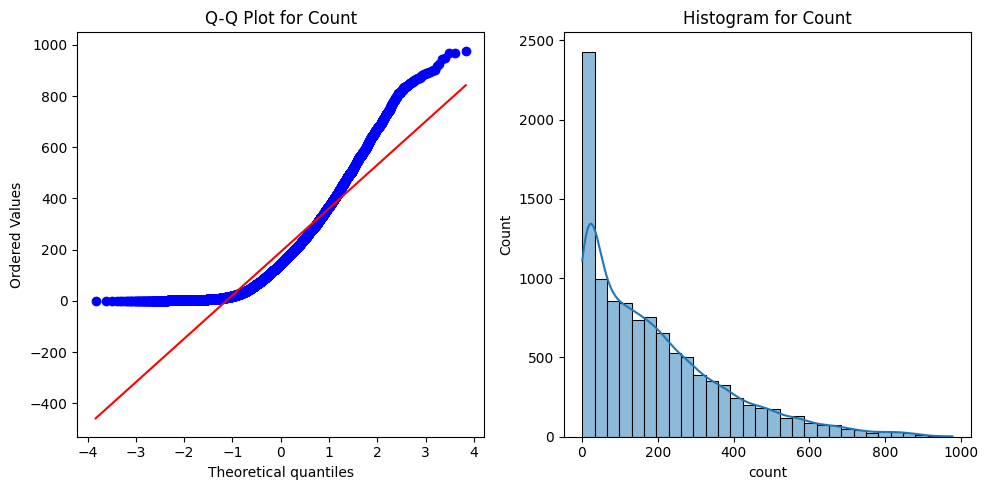

In [18]:
from scipy.stats import shapiro, levene
from scipy import stats

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
stats.probplot(df['count'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Count')

plt.subplot(1, 2, 2)
sns.histplot(df['count'], bins=30, kde=True)
plt.title('Histogram for Count')

plt.tight_layout()
plt.show()

The Q-Q plot shows some deviation from a perfect normal distribution, especially in the tails.

## Shapiro-Wilk test for normality assumption

In [19]:
shapiro_stat, shapiro_pvalue = shapiro(df['count'])
print(f'Shapiro-Wilk Test for Normality:\nTest Statistic: {shapiro_stat}\nP-Value: {shapiro_pvalue}')
alpha = 0.05
if(shapiro_pvalue <= alpha):
  print("we reject the null hypothesis and conclude that the 'count' variable is not normally distributed.")
else:
  print("we accept the null hypothesis and conclude that the 'count' variable is normally distributed.")

Shapiro-Wilk Test for Normality:
Test Statistic: 0.8783695697784424
P-Value: 0.0
we reject the null hypothesis and conclude that the 'count' variable is not normally distributed.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Equal variance check using box plots and Levene's test

### Equal variance check using box plots

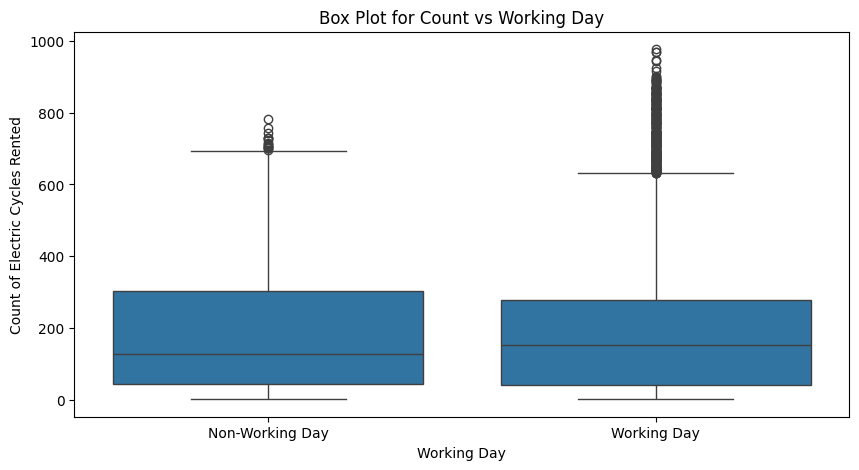

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='workingday_label', y='count')
plt.title('Box Plot for Count vs Working Day')
plt.xlabel('Working Day')
plt.ylabel('Count of Electric Cycles Rented')
plt.show()

### Levene's test for equal variance assumption

In [21]:
workingday_0 = df[df['workingday'] == 0]['count']
workingday_1 = df[df['workingday'] == 1]['count']
levene_stat, levene_pvalue = levene(workingday_0, workingday_1)
print(f'Levene\'s Test for Equal Variance:\nTest Statistic: {levene_stat}\nP-Value: {levene_pvalue}')
alpha = 0.05
if levene_pvalue > alpha:
  print("we accept the null Hypothesis, we conclude that there is no significant difference in variances in the 'count' variable between working days and non-working days.")
else:
  print("we reject the null Hypothesis, we conclude that there is significant difference in variances in the 'count' variable between working days and non-working days.")

Levene's Test for Equal Variance:
Test Statistic: 0.004972848886504472
P-Value: 0.9437823280916695
we accept the null Hypothesis, we conclude that there is no significant difference in variances in the 'count' variable between working days and non-working days.


# Conclusions and Reccomendations

- Seasons Analysis:
  - Highest demand in Fall and Summer, decrease in Spring.
  - Recommendations: Focus on Fall and Summer demand, run Spring marketing campaigns.

- Weather Preferences:
  - Clear weather preferred, followed by cloudy.
  - Recommendations: Try surge pricing on cloudy days.

- Season + Weather Impact:
  - Peak demand in Fall & Clear, Summer & Clear, Winter & Clear, Fall & Cloudy, Winter & Cloudy.
  - Recommendations: Implement surge pricing during peak conditions.

- Working Day vs. Holiday Impact:
  - No significant demand difference between working and non-working days.
  - Holidays see higher demand from non-registered customers.
  - Recommendations: Focus on holiday loyalty campaigns and targeted ads.

- Temperature Impact:
  - Strong correlation between temperature and customer count.
  - Recommendations: Expand in 17°C to 41°C cities, market during colder seasons (0°C to 12°C).

These insights and recommendations are derived from analyzing Yulu's data to optimize operations and marketing strategies for better performance.